# **Máquina de Soporte Vectorial**

In [1]:
install.packages("kernlab")
library(kernlab)

Installing package into ‘/home/giovanni/R/x86_64-pc-linux-gnu-library/3.6’
(as ‘lib’ is unspecified)



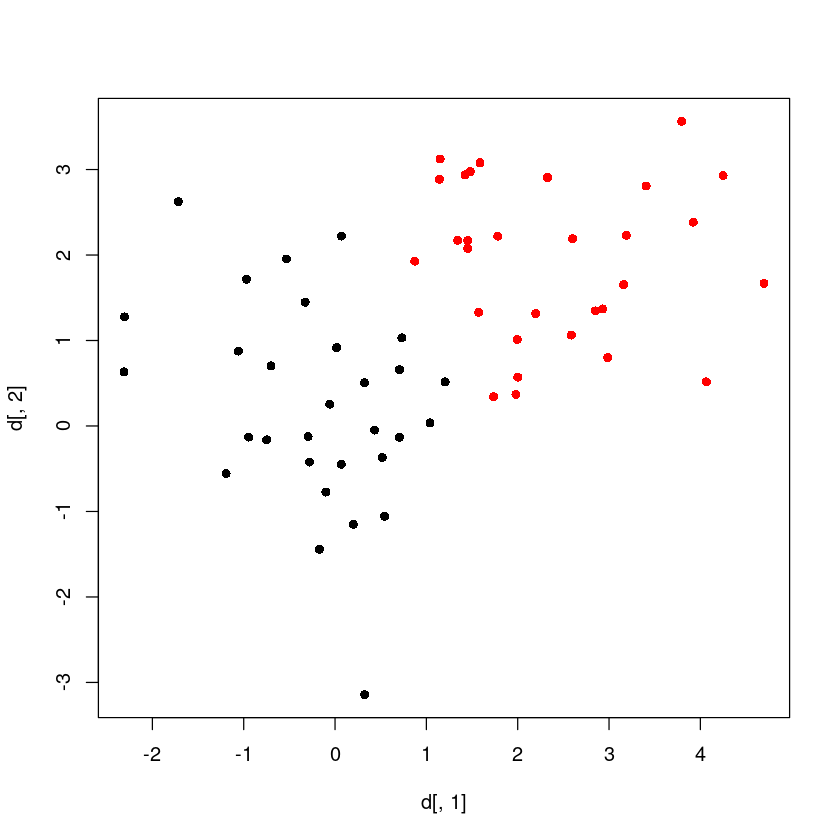

In [2]:
x1<-rnorm(30,0,1)
y1<-rnorm(30,0,1)
x2<-rnorm(30,2,1)
y2<-rnorm(30,2,1)
c<-c(rep(0,30),rep(1,30))
categoria<-factor(c)
d<-data.frame(c(x1,x2),c(y1,y2),categoria)
names(d)<-c("X","Y","categoria")
plot(d[,1],d[,2],col=d[,3],pch=16)

[1] 0
Levels: 0 1

[1]  3 15 20 23 25 33 49 50 53 54 56

[[1]]
 [1] 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 0.6548549 1.0000000
 [8] 0.3451451 1.0000000 1.0000000 1.0000000

[1] 0.04265677

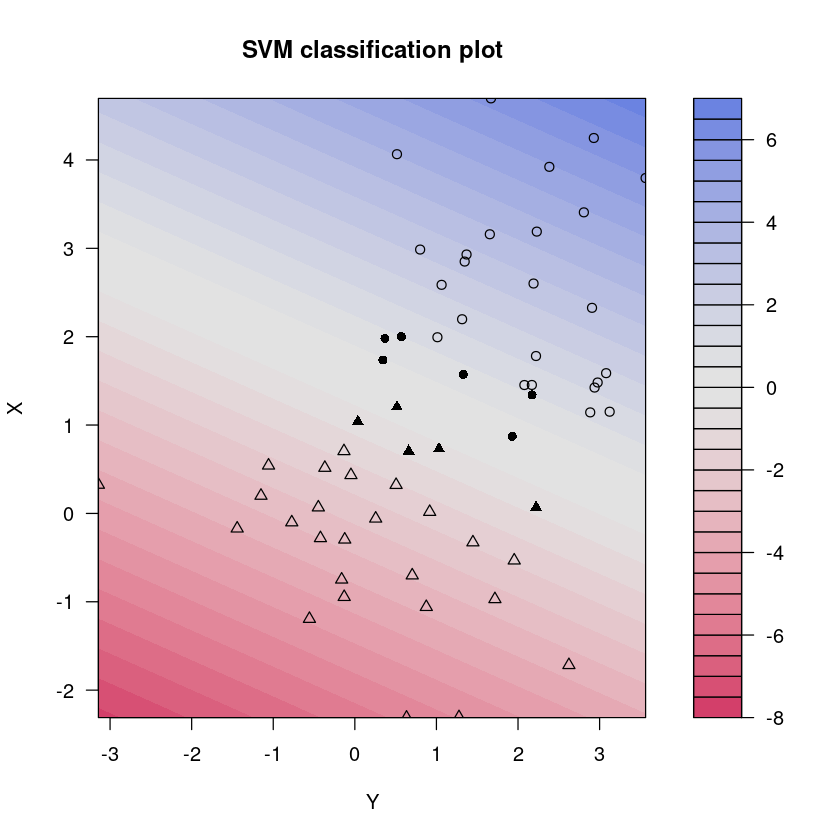

In [3]:
s<-ksvm(categoria~X+Y,data=d,kernel="p",cost=1,kpar=list(degree=1,offset=0))
plot(s,data=d)
#los support vectors que tiene un valor de epsilon_i mayor que 0 estan marcados
#en negritos; se dibujan la grafica de contornos de la g() estimada.

a<-matrix(c(2,-2),ncol=2)
names(a)<-c("X","Y")
predict(s,a)

#para saber el valor de los vectores de soporte y sus alfas
s@SVindex
s@alpha
s@b #la constante en la solucion

**Evaluar sobre conjunto de prueba**




In [4]:
x1<-rnorm(30,0,1)
y1<-rnorm(30,0,1)
x2<-rnorm(30,2,1)
y2<-rnorm(30,2,1)
c<-c(rep(0,30),rep(1,30))
categoria<-factor(c)
dtest<-data.frame(c(x1,x2),c(y1,y2),categoria)
names(dtest)<-c("X","Y","categoria")
test<-table(pred=predict(s,dtest),truth=dtest$categoria)
test

    truth
pred  0  1
   0 28  5
   1  2 25

**Experimento 1: ¿cuál es el efecto de cambiar el parámetro lambda/gamma (cost)?** (efecto sobre la solución encontrada, número de vectores de soporte, etc)


Asigna a cost un valor entre 10 y 0.05:


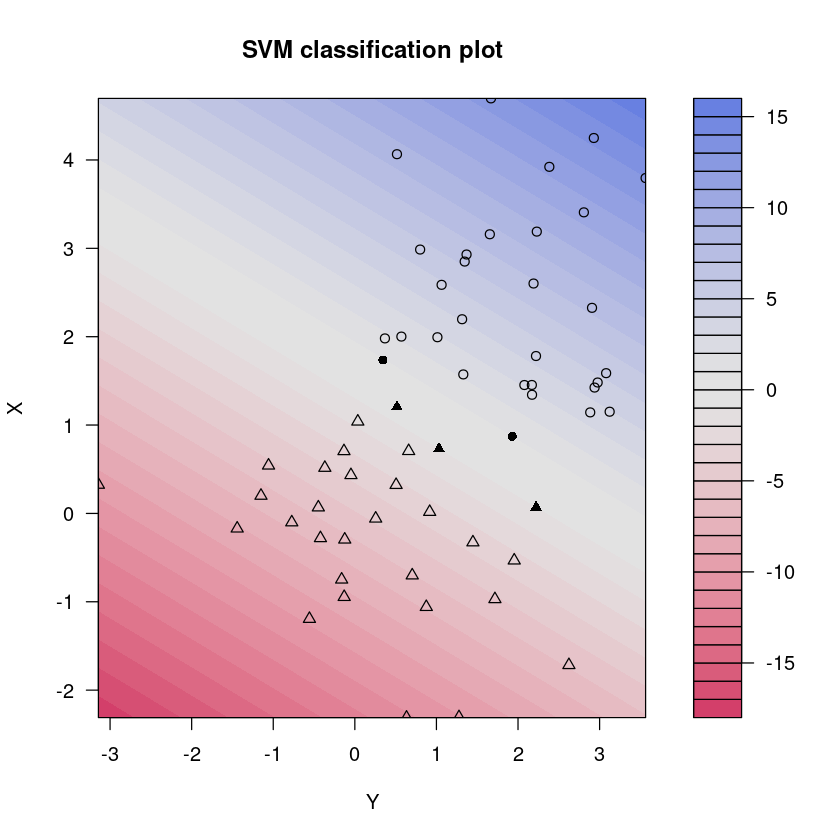

In [6]:
cost=10
s<-ksvm(categoria~X+Y,data=d,kernel="p",C=cost,kpar=list(degree=1,offset=0))
plot(s,data=d)

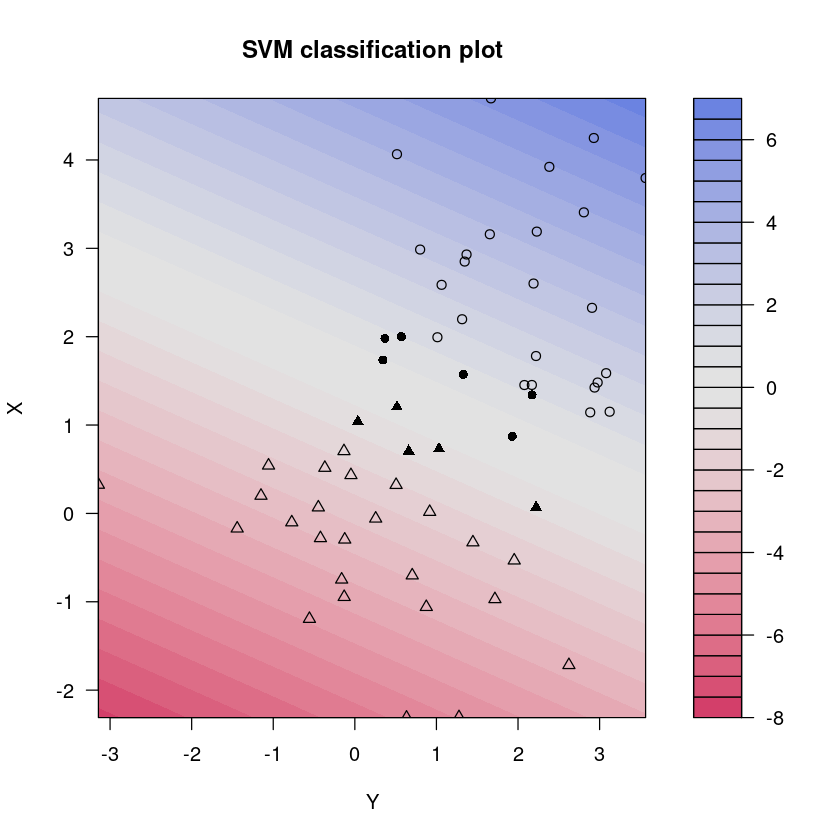

In [7]:
cost=1
s<-ksvm(categoria~X+Y,data=d,kernel="p",C=cost,kpar=list(degree=1,offset=0))
plot(s,data=d)

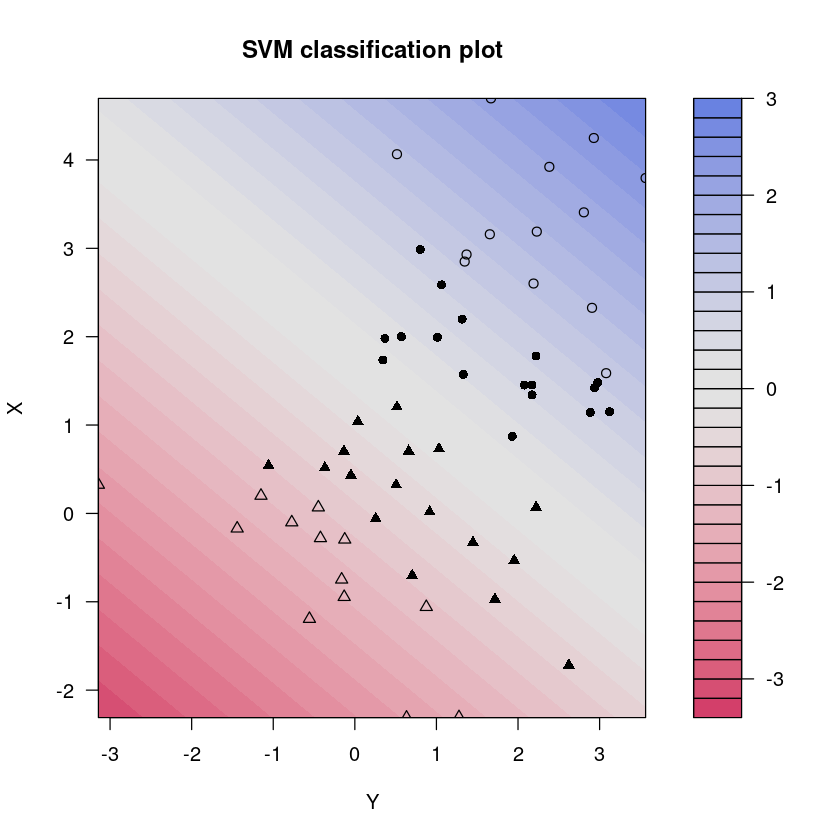

In [8]:
cost=0.05
s<-ksvm(categoria~X+Y,data=d,kernel="p",C=cost,kpar=list(degree=1,offset=0))
plot(s,data=d)

 **Experimento 2: ¿cuál es el efecto de aumentar el grado del polinomio?**

Asigna a degree un valor entre 1 y 10

In [ ]:
degree<- 1

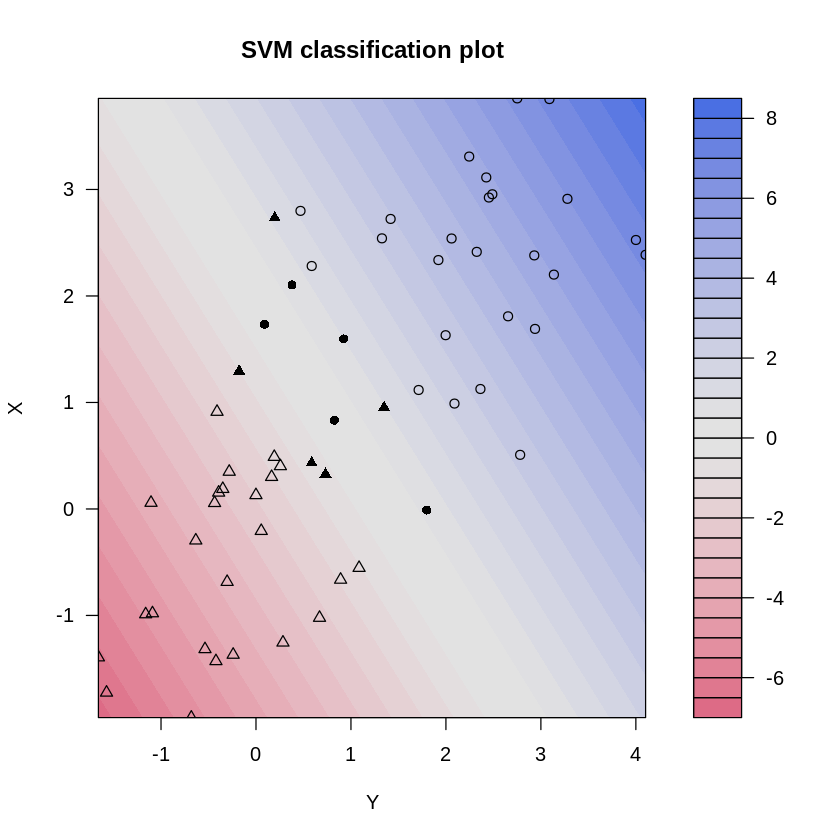

In [ ]:
s<-ksvm(categoria~X+Y,data=d,kernel="p",C=11,kpar=list(degree=degree,offset
=1))
plot(s,data=d)

**Experimento 3: ¿cuál es el efecto de cambiar el parámetro del kernel de base radial?:**

¿Cuándo se parece al caso de kernel lineal?

Asigna a sigma un valor entre 0.5 y 20

In [ ]:
sigma=20

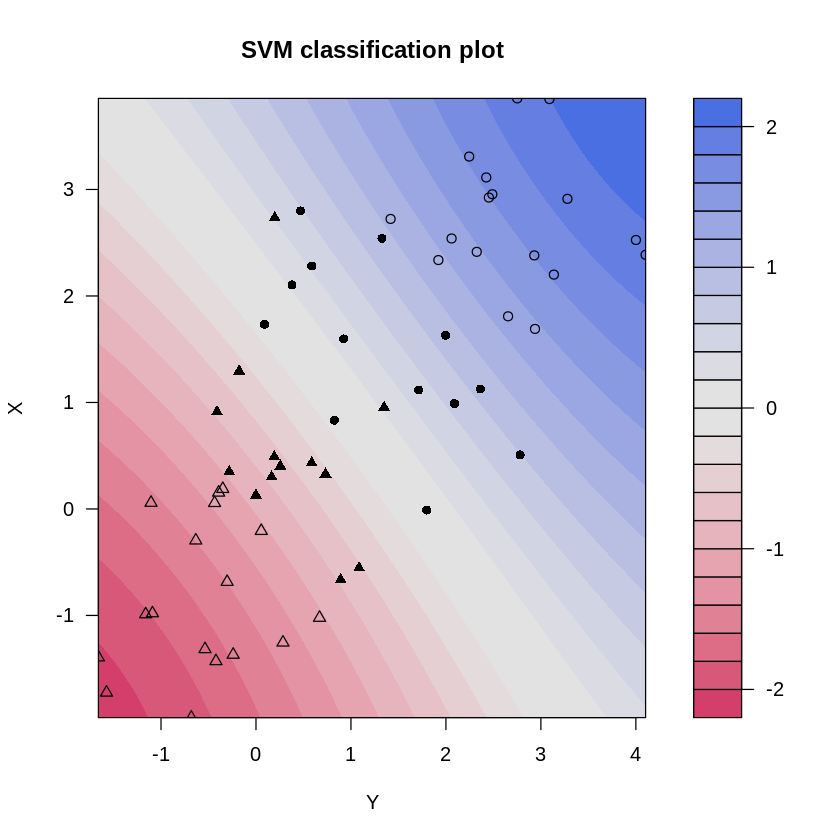

In [ ]:
s<-ksvm(categoria~X+Y,data=d,kernel="r",C=1,kpar=list(sigma=1/sigma))
plot(s,data=d)

In [ ]:
colnames(d)

[1] "X"         "Y"         "categoria"

# **Datos espiral**

In [ ]:
install.packages("mlbench")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



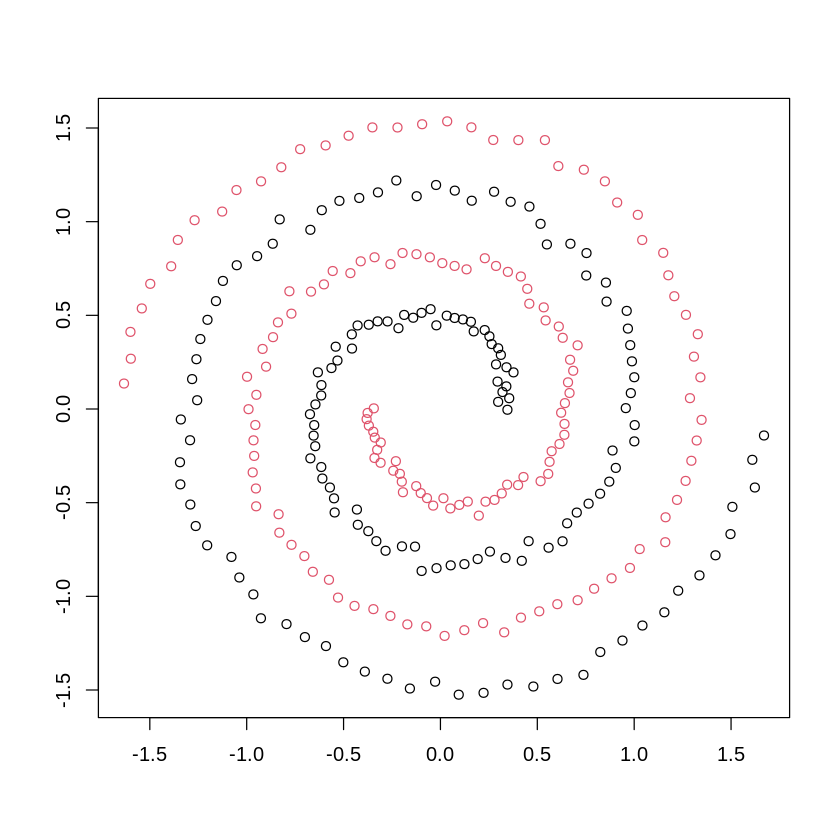

In [ ]:
library(kernlab)
library(mlbench)
ds<-mlbench.spirals(300,2,0.03)
plot(ds)


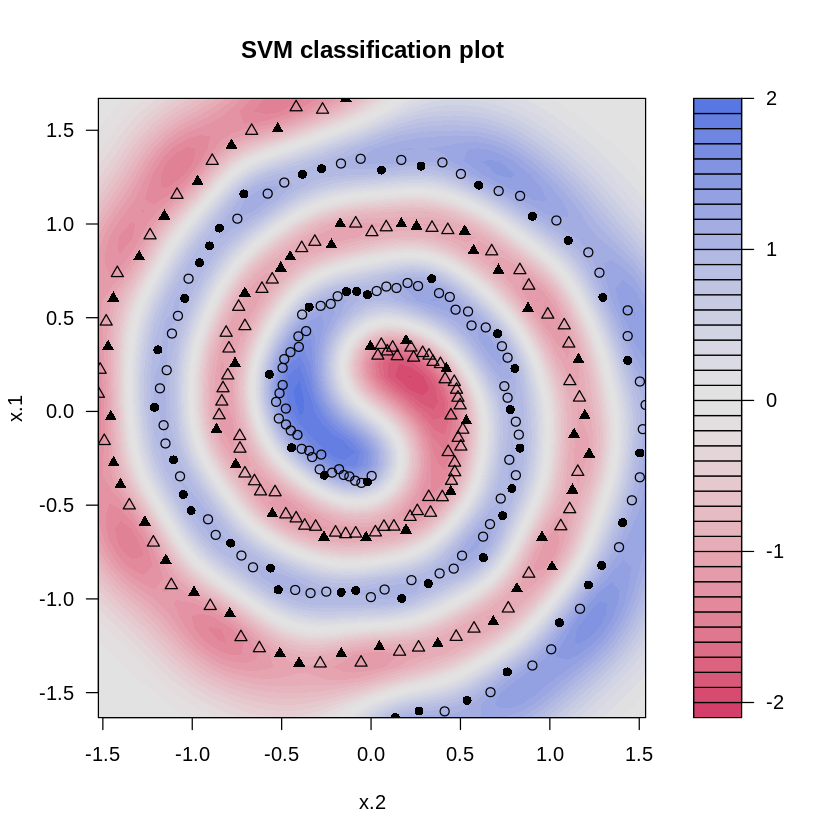

In [ ]:
ss<-ksvm(classes ~.,data=ds,kernel="r",C=120,kpar=list(sigma=1/0.2))
plot(ss,data=ds)


**Experimento 4: ¿cuál es el efecto de cambiar el parámetro sigma del kernel de base radial?:**

In [ ]:
sigma=20  # cambia sigma
s<-ksvm(categoria~X+Y,data=ds,kernel="r",C=1,kpar=list(sigma=1/sigma))
plot(s,data=ds)